# Data Preprocessing


In [158]:
import pandas as pd

In [159]:
#Temperature
url = 'https://raw.githubusercontent.com/parzivalsupreme/Datasets/refs/heads/main/GlobalWeatherRepository.csv'

df = pd.read_csv(url)
df.dropna()
df.drop_duplicates()

temperature_celsius_data = df[['Country','temperature_celsius']]
temperature_celsius_data.head(10)

,Country,temperature_celsius
0,Afghanistan,26.6
1,Albania,19.0
2,Algeria,23.0
3,Andorra,6.3
4,Angola,26.0
5,Antigua and Barbuda,26.0
6,Argentina,8.0
7,Armenia,19.0
8,Australia,9.0
9,Austria,16.0


In [160]:
#IQ
url = 'https://raw.githubusercontent.com/parzivalsupreme/Datasets/refs/heads/main/avgIQpercountry.csv'

df = pd.read_csv(url)
df.dropna()
df.drop_duplicates()

Average_IQ_data = df[['Country','Average IQ']]
Average_IQ_data.head(10)

,Country,Average IQ
0,Japan,106.48
1,Taiwan,106.47
2,Singapore,105.89
3,Hong Kong,105.37
4,China,104.10
5,South Korea,102.35
6,Belarus,101.60
7,Finland,101.20
8,Liechtenstein,101.07
9,Germany,100.74


In [161]:
#Combine both data into one dataframe
df_combined = pd.merge(temperature_celsius_data, Average_IQ_data, on='Country', how='inner')

df_combined.head(10)

,Country,temperature_celsius,Average IQ
0,Afghanistan,26.6,82.12
1,Albania,19.0,81.75
2,Algeria,23.0,76.00
3,Andorra,6.3,95.20
4,Angola,26.0,75.10
5,Antigua and Barbuda,26.0,70.48
6,Argentina,8.0,86.63
7,Armenia,19.0,88.82
8,Australia,9.0,99.24
9,Austria,16.0,98.38


In [162]:
#Pearson Correlation
correlation = df_combined['temperature_celsius'].corr(df_combined['Average IQ'])
print(f"Pearson Correlation Coefficient: {correlation}")

Pearson Correlation Coefficient: -0.35186252826062603


In [163]:
x = df_combined['temperature_celsius']
y = df_combined['Average IQ']

# Visualizations

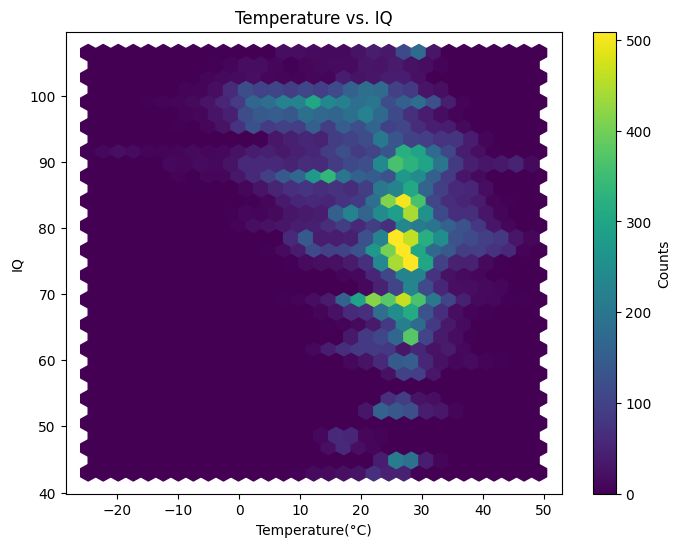

In [164]:
import numpy as np
import matplotlib.pyplot as plt

# Creating Hexbin plot
plt.figure(figsize=(8, 6))
hb = plt.hexbin(x, y, gridsize=30, cmap='viridis')
plt.colorbar(hb, label='Counts')
plt.title("Temperature vs. IQ")
plt.xlabel("Temperature(°C)")
plt.ylabel("IQ")
plt.show()


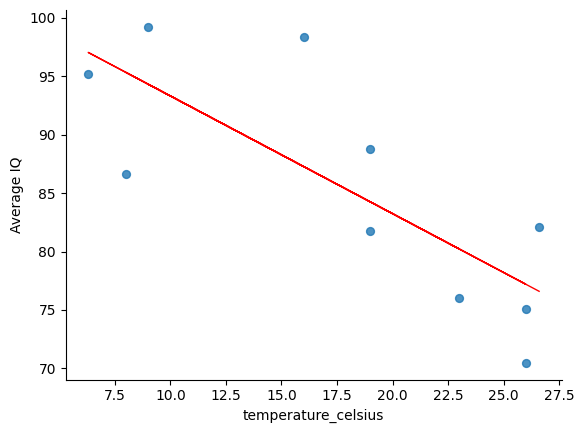

In [165]:
from matplotlib import pyplot as plt
import numpy as np

# Scatter plot
_df_2.plot(kind='scatter', x='temperature_celsius', y='Average IQ', s=32, alpha=.8)

# Fit a line to the data
x = _df_2['temperature_celsius']
y = _df_2['Average IQ']
m, b = np.polyfit(x, y, 1)

# Plot the regression line
plt.plot(x, m * x + b, color='red', linestyle='-', linewidth=1)  # Line aligned with data

# Customize plot
plt.gca().spines[['top', 'right']].set_visible(False)